In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("LoanApprovalPrediction.csv")  # replace with your dataset path

# Preview dataset
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42, stratify=Y
)

print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")


Training samples: 418, Test samples: 180


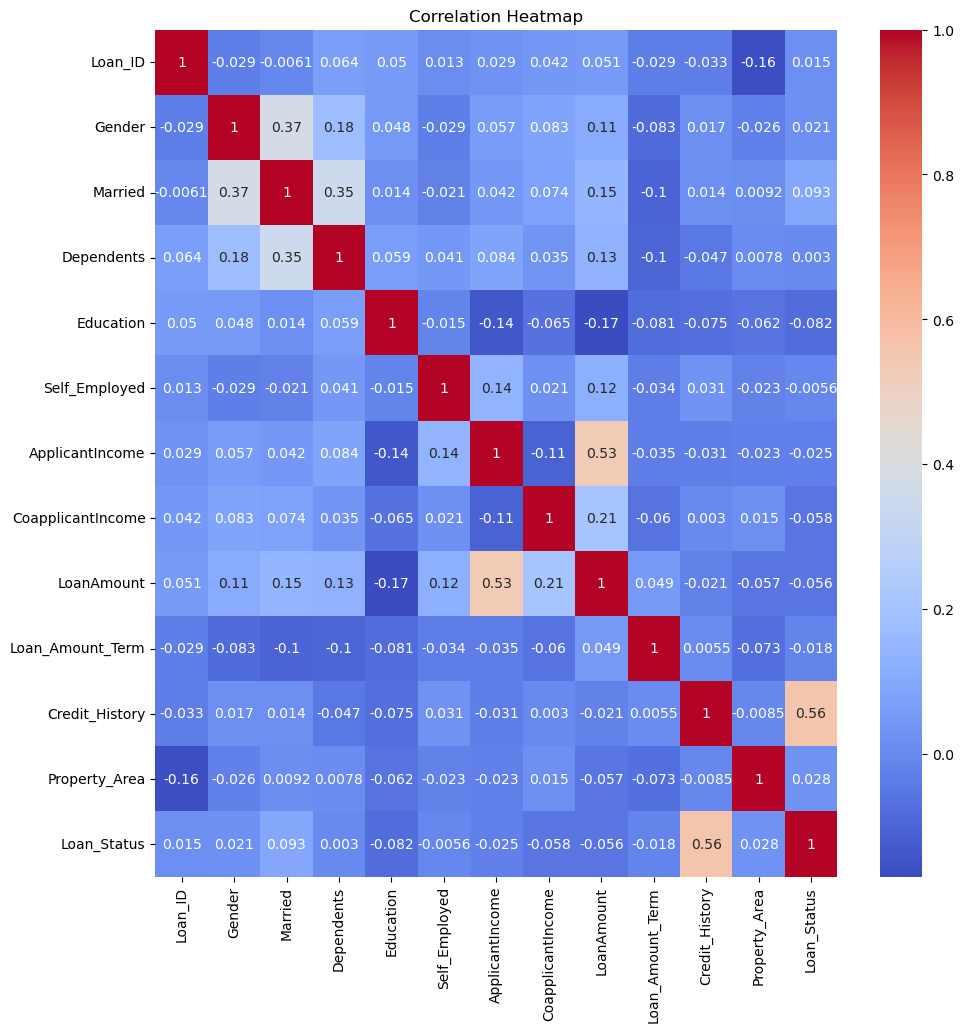

In [17]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

for col in df_encoded.columns:
    if df_encoded[col].dtype == "object":
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

corr = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(11, 11))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [18]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Numeric imputer
num_imputer = SimpleImputer(strategy='median')

# Fit on training numeric features
X_train_num = pd.DataFrame(num_imputer.fit_transform(X_train[num_cols]), columns=num_cols)
X_test_num = pd.DataFrame(num_imputer.transform(X_test[num_cols]), columns=num_cols)


In [19]:
from sklearn.preprocessing import OneHotEncoder

# Fill missing categorical values
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train_cat = pd.DataFrame(cat_imputer.fit_transform(X_train[cat_cols]), columns=cat_cols)
X_test_cat = pd.DataFrame(cat_imputer.transform(X_test[cat_cols]), columns=cat_cols)

# One-hot encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_cat_enc = pd.DataFrame(encoder.fit_transform(X_train_cat),
                               columns=encoder.get_feature_names_out(cat_cols))
X_test_cat_enc = pd.DataFrame(encoder.transform(X_test_cat),
                              columns=encoder.get_feature_names_out(cat_cols))



In [20]:
# Concatenate numeric and encoded categorical features
X_train_processed = pd.concat([X_train_num, X_train_cat_enc], axis=1)
X_test_processed = pd.concat([X_test_num, X_test_cat_enc], axis=1)

print(f"Processed training shape: {X_train_processed.shape}")


Processed training shape: (418, 20)


In [21]:
import joblib
joblib.dump(num_imputer, "num_imputer.pkl")
joblib.dump(cat_imputer, "cat_imputer.pkl")
joblib.dump(encoder, "cat_encoder.pkl")


['cat_encoder.pkl']

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced',
    random_state=42
)

rf_model.fit(X_train_processed, Y_train)


RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, min_samples_split=10,
                       n_estimators=200, random_state=42)

In [23]:


joblib.dump(rf_model, "loan_model.pkl")

['loan_model.pkl']

Accuracy: 0.7944
Precision: 0.8042
Recall: 0.9274
F1-score: 0.8614


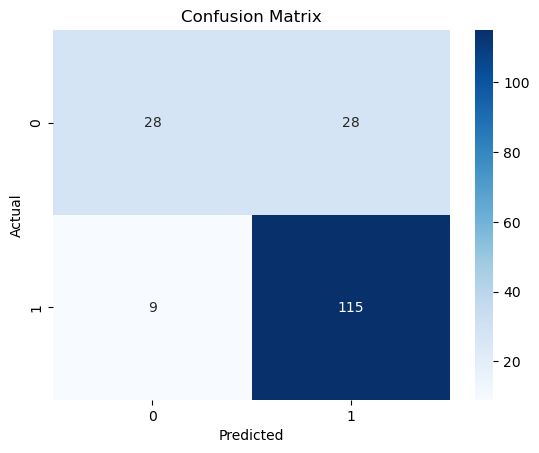

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict
y_pred = rf_model.predict(X_test_processed)

# Metrics
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
